### Polynomial Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Create a polynomial distribution using numpy
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100, 1)

Text(0, 0.5, 'Y dataset')

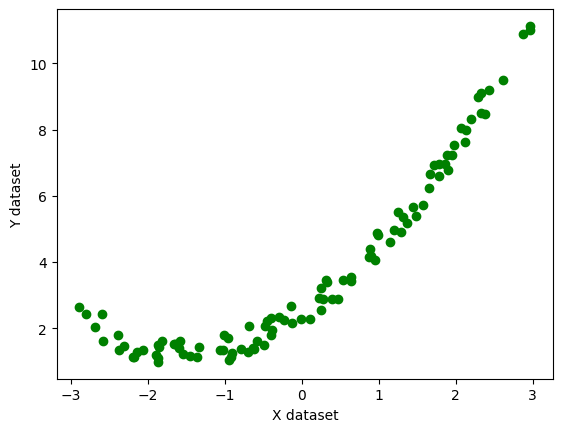

In [3]:
plt.scatter(X, y, color="g")
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()

In [10]:
linearRegression.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
linearScore = r2_score(y_test, linearRegression.predict(X_test))
print(linearScore)

0.7899928465811294


## Visualise the linear Model

Text(0, 0.5, 'y dataset')

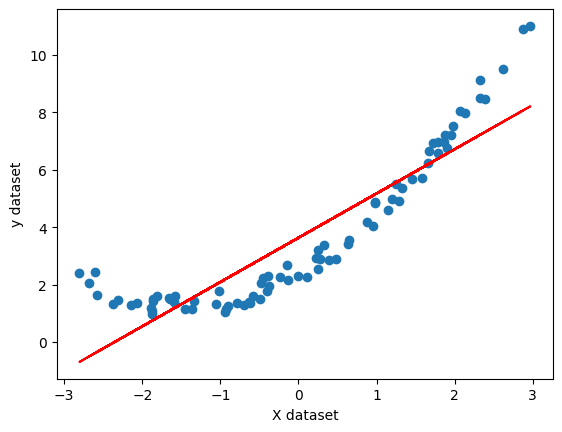

In [13]:
plt.plot(X_train, linearRegression.predict(X_train), color="r")
plt.scatter(X_train, y_train)
plt.xlabel("X dataset")
plt.ylabel("y dataset")

### Applying polynomial transformation

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [19]:
X_train_poly

array([[ 1.00000000e+00, -1.87336298e+00,  3.50948884e+00],
       [ 1.00000000e+00,  1.78133984e+00,  3.17317163e+00],
       [ 1.00000000e+00, -1.01727025e+00,  1.03483877e+00],
       [ 1.00000000e+00,  1.89650421e+00,  3.59672821e+00],
       [ 1.00000000e+00, -2.57818722e+00,  6.64704933e+00],
       [ 1.00000000e+00,  1.67033676e+00,  2.79002489e+00],
       [ 1.00000000e+00, -2.33198502e-01,  5.43815412e-02],
       [ 1.00000000e+00,  9.84969249e-01,  9.70164422e-01],
       [ 1.00000000e+00,  1.14247012e+00,  1.30523798e+00],
       [ 1.00000000e+00,  1.97966813e+00,  3.91908589e+00],
       [ 1.00000000e+00,  2.72211360e-01,  7.40990244e-02],
       [ 1.00000000e+00, -1.64244229e+00,  2.69761669e+00],
       [ 1.00000000e+00, -1.30836695e-01,  1.71182407e-02],
       [ 1.00000000e+00, -1.89313876e+00,  3.58397437e+00],
       [ 1.00000000e+00, -1.43995020e-01,  2.07345659e-02],
       [ 1.00000000e+00, -1.33524368e+00,  1.78287569e+00],
       [ 1.00000000e+00, -2.80471453e+00

In [20]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
yPred = regression.predict(X_test_poly)
score = r2_score(y_test, yPred)
print(f"R2 Score: {score}")

R2 Score: 0.9905507132563671


### Plot the best fit line of the polynomial regression

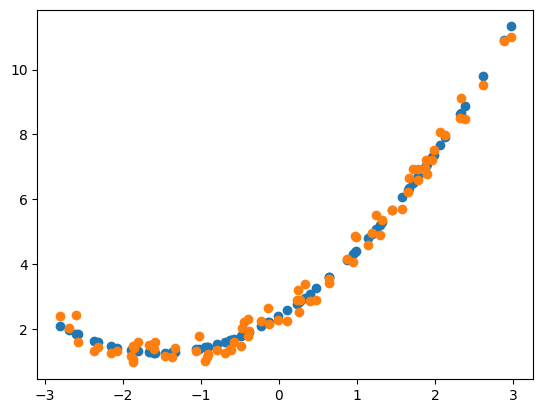

In [22]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

### Prediction of new dataset

In [23]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

In [25]:
# Gives - [ 1, x1, x1^2]
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

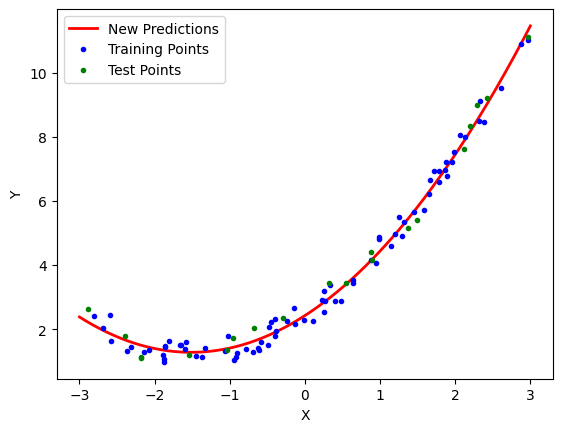

In [29]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Test Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()